In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time
from subprocess import check_output
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
data = pd.read_csv('input_data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
col = data.columns       
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [5]:
y = data['diagnosis']                   # M or B 
list = ['Unnamed: 32','id','diagnosis']
x = data.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Benign:  357
Number of Malignant :  212


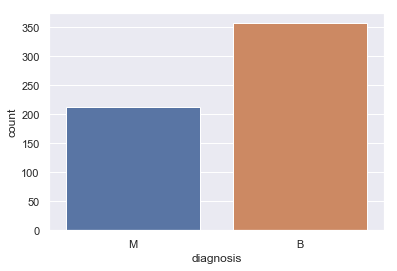

In [6]:
sns.set(style="darkgrid")
ax = sns.countplot(x = y)       # M = 212, B = 357
B, M = y.value_counts(sort=True) #sort=True (default) in order to be sure B, M are in the right order (alphabetical)
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [7]:
x.isnull().values.any()

False

In [8]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
data = x
data_normal = (data - data.mean()) / (data.std())    

In [10]:
def violin_plot(beginning,end):
    data = pd.concat([y,data_normal.iloc[:,beginning:end]],axis=1)
    data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name='value')
    plt.figure(figsize=(10,10))
    sns.violinplot(x="features", y="value", hue="diagnosis", data=data, split=True, inner="quart")
    plt.xticks(rotation=45)

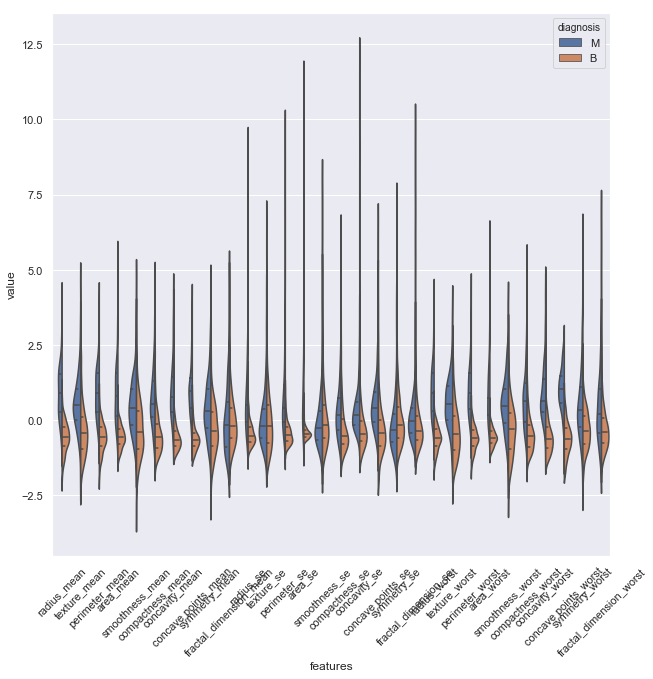

In [11]:
violin_plot(0,30)

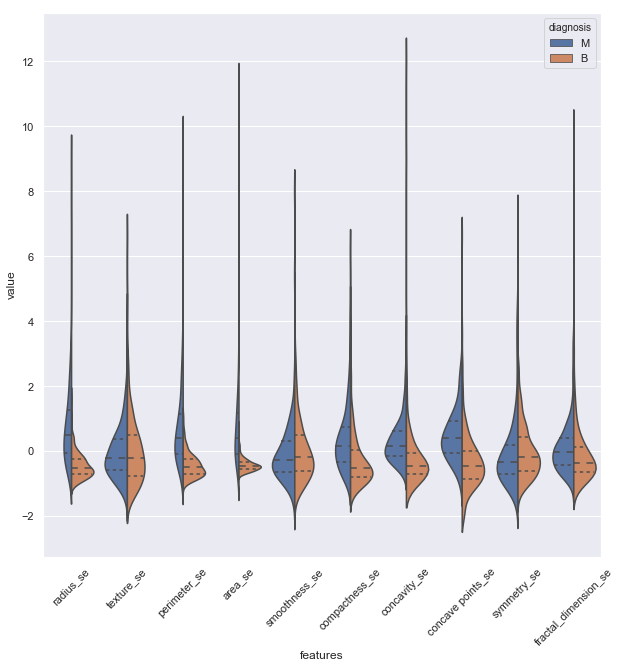

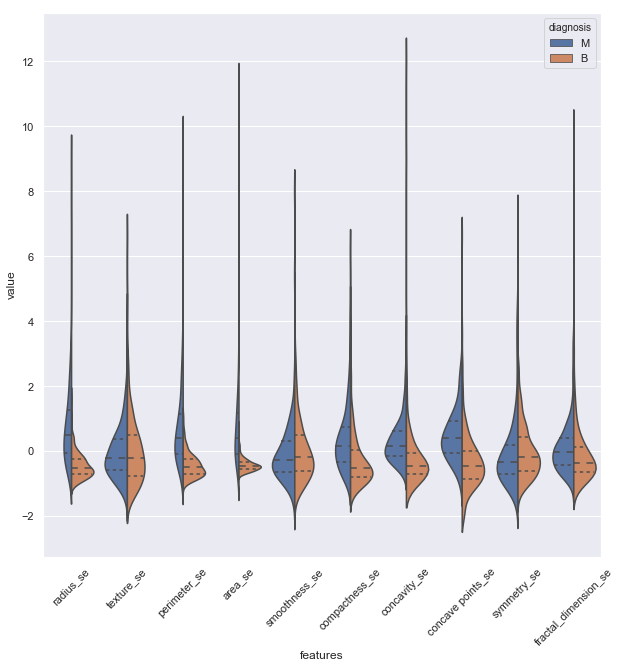

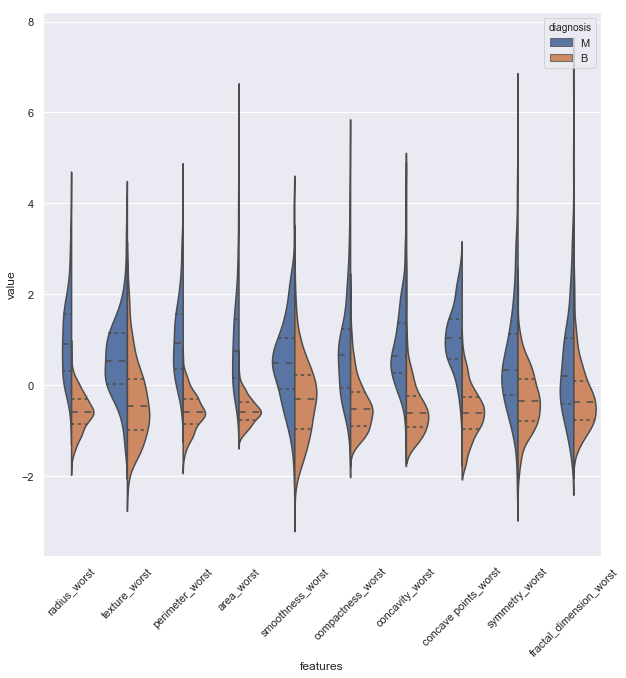

In [12]:
violin_plot(10,20)
violin_plot(10,20)
violin_plot(20,30)

In [13]:
def joint_plot(feature1, feature2):

    sns.jointplot(x.loc[:,feature1], x.loc[:,feature2], kind="regg", color="blue")

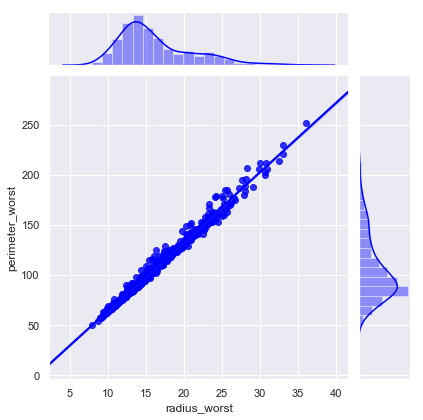

In [14]:
joint_plot("radius_worst","perimeter_worst")

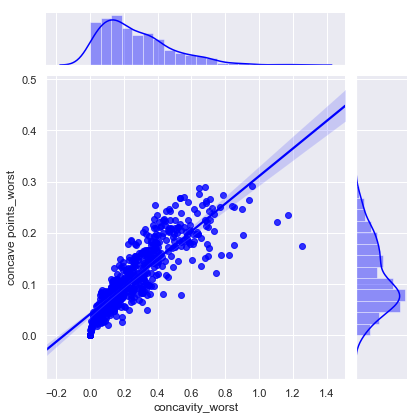

In [15]:
joint_plot("concavity_worst","concave points_worst")

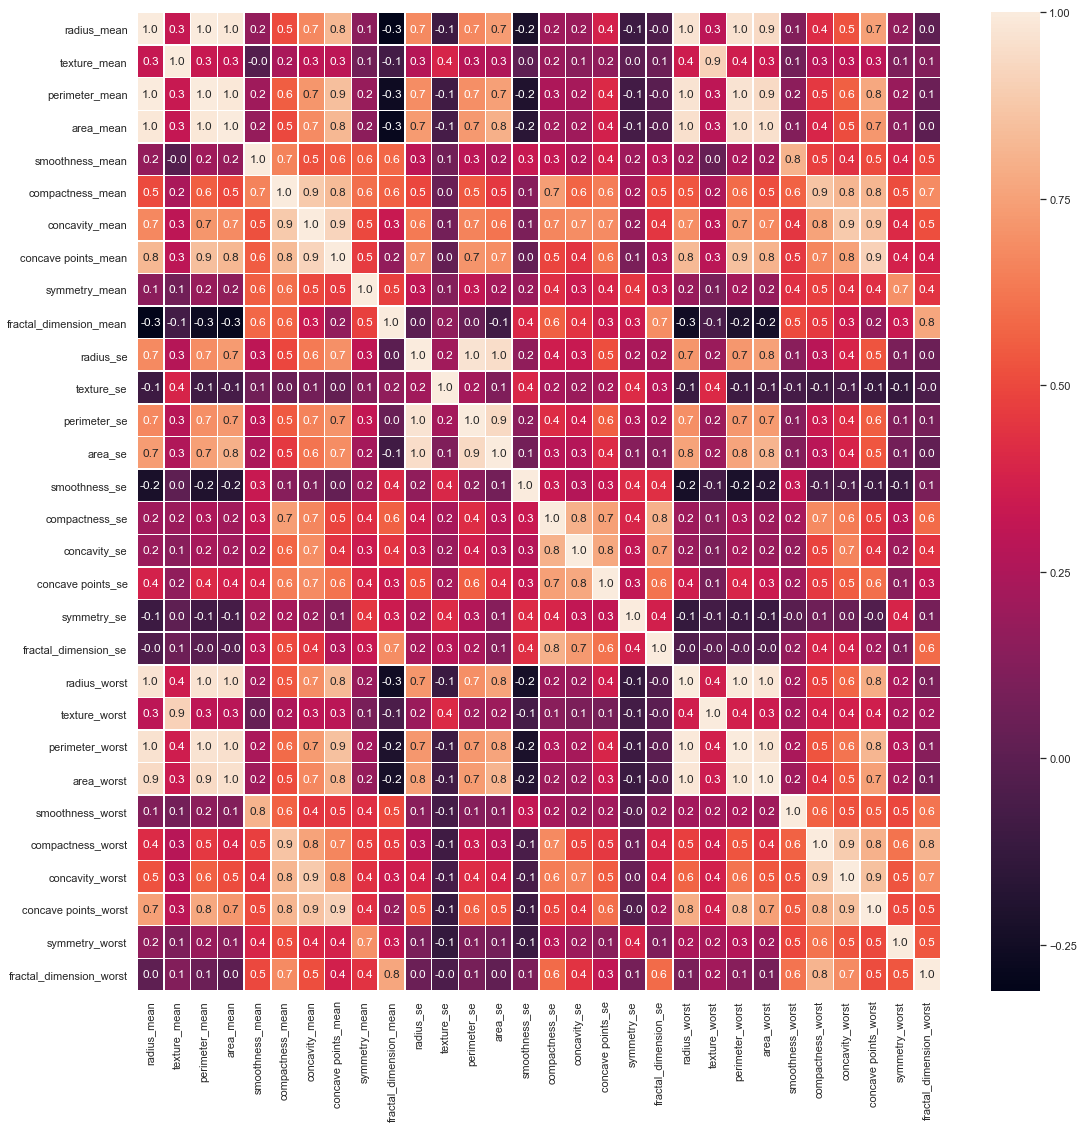

In [16]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [17]:
drop_list = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list,axis = 1 )        # do not modify x, we will use it later 
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


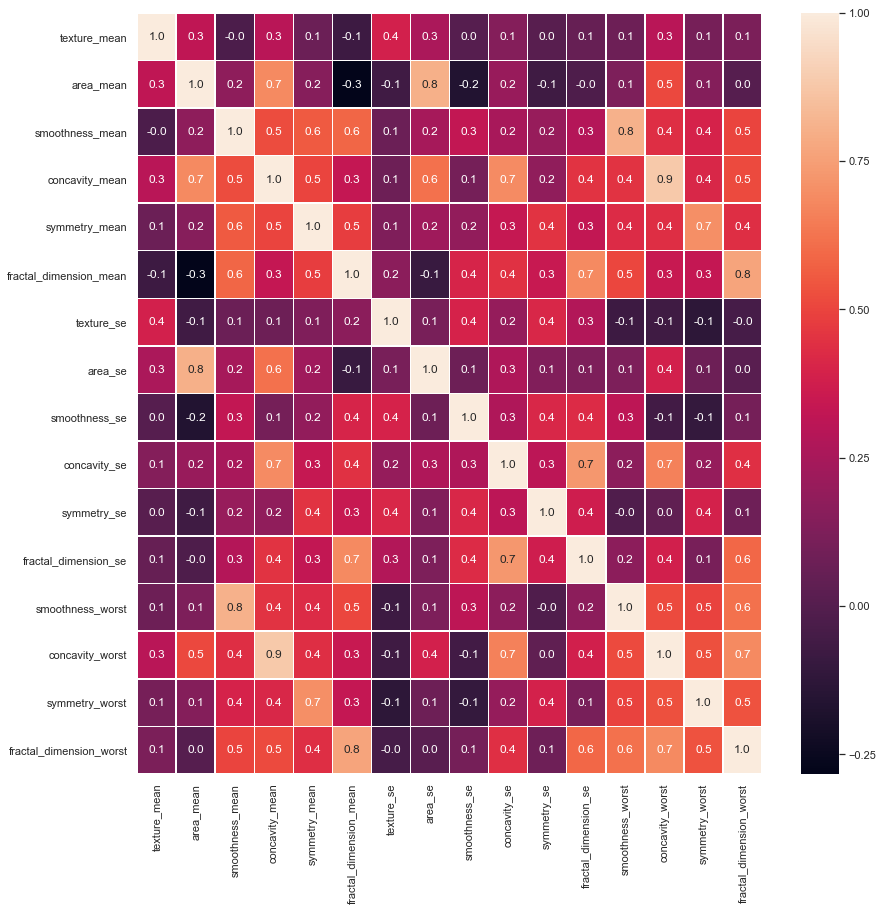

In [18]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [19]:
x_1.to_csv('output1.csv',index=False)

In [20]:
drop_list = ["radius_se","texture_se","perimeter_mean","perimeter_se","area_mean","smoothness_mean","smoothness_se","smoothness_worst","compactness_mean","compactness_se","compactness_worst","concavity_se","concave points_se","symmetry_mean","symmetry_se","symmetry_worst","fractal_dimension_mean","fractal_dimension_se","fractal_dimension_worst"]
print("Number of eliminated features :", len(drop_list))
x_2 = x.drop(drop_list,axis = 1)        # do not modify x, we will use it later 
x_2.head()

Number of eliminated features : 19


,radius_mean,texture_mean,concavity_mean,concave points_mean,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
0,17.99,10.38,0.3001,0.14710,153.40,25.38,17.33,184.60,2019.0,0.7119,0.2654
1,20.57,17.77,0.0869,0.07017,74.08,24.99,23.41,158.80,1956.0,0.2416,0.1860
2,19.69,21.25,0.1974,0.12790,94.03,23.57,25.53,152.50,1709.0,0.4504,0.2430
3,11.42,20.38,0.2414,0.10520,27.23,14.91,26.50,98.87,567.7,0.6869,0.2575
4,20.29,14.34,0.1980,0.10430,94.44,22.54,16.67,152.20,1575.0,0.4000,0.1625


In [21]:
x_2.to_csv('output1.csv',index=False)

In [28]:
x3 = pd.read_csv('output1.csv')

In [29]:
x3.head()


,radius_mean,texture_mean,concavity_mean,concave points_mean,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst,diagnosis
0,17.99,10.38,0.3001,0.14710,153.40,25.38,17.33,184.60,2019.0,0.7119,0.2654,M
1,20.57,17.77,0.0869,0.07017,74.08,24.99,23.41,158.80,1956.0,0.2416,0.1860,M
2,19.69,21.25,0.1974,0.12790,94.03,23.57,25.53,152.50,1709.0,0.4504,0.2430,M
3,11.42,20.38,0.2414,0.10520,27.23,14.91,26.50,98.87,567.7,0.6869,0.2575,M
4,20.29,14.34,0.1980,0.10430,94.44,22.54,16.67,152.20,1575.0,0.4000,0.1625,M


In [30]:
x3['diagnosis'] = x3['diagnosis'].apply(lambda x: '1' if x == 'M' else '0')

In [31]:
x3.head()

,radius_mean,texture_mean,concavity_mean,concave points_mean,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst,diagnosis
0,17.99,10.38,0.3001,0.14710,153.40,25.38,17.33,184.60,2019.0,0.7119,0.2654,1
1,20.57,17.77,0.0869,0.07017,74.08,24.99,23.41,158.80,1956.0,0.2416,0.1860,1
2,19.69,21.25,0.1974,0.12790,94.03,23.57,25.53,152.50,1709.0,0.4504,0.2430,1
3,11.42,20.38,0.2414,0.10520,27.23,14.91,26.50,98.87,567.7,0.6869,0.2575,1
4,20.29,14.34,0.1980,0.10430,94.44,22.54,16.67,152.20,1575.0,0.4000,0.1625,1


In [32]:
x3.to_csv('output2_final.csv',index=False)